In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Social Media Influencer/train.csv')

In [46]:
df.isnull().sum() #no missing values ;)

Choice                 0
A_follower_count       0
A_following_count      0
A_listed_count         0
A_mentions_received    0
A_retweets_received    0
A_mentions_sent        0
A_retweets_sent        0
A_posts                0
A_network_feature_1    0
A_network_feature_2    0
A_network_feature_3    0
B_follower_count       0
B_following_count      0
B_listed_count         0
B_mentions_received    0
B_retweets_received    0
B_mentions_sent        0
B_retweets_sent        0
B_posts                0
B_network_feature_1    0
B_network_feature_2    0
B_network_feature_3    0
dtype: int64

In [3]:
df.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,11355.000000,34463,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,1330.366048,39262,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,5999.896907,3622,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,96.166667,19562,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,2833.847943,7554,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [24]:
y=df.iloc[:,0].values  #dependent variable
x=df.iloc[:,1:].values #independent variable

[[2.28000000e+02 3.02000000e+02 3.00000000e+00 ... 6.60000000e+01
  7.55303030e+01 1.91689394e+03]
 [2.15910000e+04 1.17900000e+03 2.28000000e+02 ... 1.63000000e+02
  1.32030675e+02 2.93151534e+03]
 [7.31000000e+03 1.21500000e+03 1.01000000e+02 ... 3.00000000e+00
  1.03333333e+01 2.77333333e+02]
 ...
 [1.53850000e+04 6.73000000e+02 7.47000000e+02 ... 8.50000000e+01
  4.85000000e+01 1.99362791e+03]
 [2.65258000e+05 2.09000000e+02 5.51000000e+02 ... 6.96000000e+02
  2.34338068e+02 7.16846449e+03]
 [6.28000000e+02 9.21000000e+02 6.00000000e+00 ... 1.28000000e+03
  4.85328185e+01 1.55448958e+03]]


In [28]:
#finding out the covariance 
from scipy.stats import pearsonr
covar={}
print('Shape of the array',x.shape) #shows 22 cols
for i in range(22):
  cov,_=pearsonr(x[:,i],y)
  #print(float(cov))
  #print(type(float(cov)))
  if float(cov)>0.10 or float(cov)<-0.10:    #dict of columns that we will be removing
    print(cov)
    covar.update({i:cov}) #index:covariance 
print(covar)

Shape of the array (5500, 22)
0.13413264616958456
0.13507809556384173
0.1238679790619239
0.13783282962763987
0.10764790658870349
-0.16127788824830816
-0.19117925748270206
-0.1395209992769779
-0.16834053126305132
-0.10202835527897872
-0.10825858338025551
{0: 0.13413264616958456, 2: 0.13507809556384173, 5: 0.1238679790619239, 6: 0.13783282962763987, 7: 0.10764790658870349, 11: -0.16127788824830816, 13: -0.19117925748270206, 16: -0.1395209992769779, 17: -0.16834053126305132, 18: -0.10202835527897872, 19: -0.10825858338025551}


In [49]:
cols_that_Iwant=list(covar.keys())
x1=np.zeros((5500,11))
print(cols_that_Iwant) #11 cols
print(x1)
for i in range(len(cols_that_Iwant)):
  #print(x[:,cols_that_Iwant[i]])
  x1[:,i]=x[:,cols_that_Iwant[i]]
print()
print(x1)

[0, 2, 5, 6, 7, 11, 13, 16, 17, 18, 19]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

[[2.28000000e+02 3.00000000e+00 1.00503359e-01 ... 3.32423044e-01
  6.98881496e+00 6.60000000e+01]
 [2.15910000e+04 2.28000000e+02 5.70932865e+00 ... 5.64342729e-01
  1.07032071e+00 1.63000000e+02]
 [7.31000000e+03 1.01000000e+02 5.36151928e+00 ... 1.00503359e-01
  6.03202317e-01 3.00000000e+00]
 ...
 [1.53850000e+04 7.47000000e+02 6.94623325e+00 ... 1.11972670e+00
  4.56324632e+00 8.50000000e+01]
 [2.65258000e+05 5.51000000e+02 5.46098549e+00 ... 1.34507340e+00
  4.35986545e+00 6.96000000e+02]
 [6.28000000e+02 6.00000000e+00 4.76992966e+00 ... 1.04940792e+00
  4.80682332e+00 1.28000000e+03]]


In [54]:
df_test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Social Media Influencer/test.csv')

In [55]:
df_test.head()

,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,614689,400,5729,199.618296,67.812469,9.366192,0.359534,4.094488,669,39.193741,2565.612519,1404323,563,20057,967.720642,579.431128,4.473798,0.805680,6.241806,4027,57.643839,3201.293706
1,739581,10723,1279,102.026750,96.771319,1.537322,1.054358,3.467754,432,11.191686,966.193995,756715,12949,1311,38.260522,10.697567,12.845793,1.584284,12.106662,144,209.717241,21496.565517
2,3638,3341,85,2.793577,1.402703,2.594089,0.598150,3.802143,11,9.416667,489.083333,488750,320,3673,1207.190077,599.721600,0.842022,0.593199,7.044735,3918,7.859818,637.983300
3,613,1259,31,1.326041,0.356943,6.249678,2.323064,7.488116,4,5.000000,275.000000,13456,3599,1072,10.300222,3.828561,1.624092,0.100503,1.614287,43,113.840909,2537.772727
4,1352348,331,15647,19129.848662,14552.733991,2.065418,0.580955,16.281502,52580,3.092448,597.563636,1481379,147521,15043,9902.070379,5012.055876,10.438460,0.100503,193.072418,28564,10.964144,1035.955493


In [61]:
df_test.shape

(5952, 22)

In [ ]:
#we only have to take the dependent variable now as can be seen above

In [62]:
x_test=np.zeros((5952,11))
for i in range(len(cols_that_Iwant)):
  x_test[:,i]=df_test.iloc[:,cols_that_Iwant[i]].values

In [63]:
x_test

array([[6.14689000e+05, 5.72900000e+03, 9.36619224e+00, ...,
        8.05680232e-01, 6.24180594e+00, 4.02700000e+03],
       [7.39581000e+05, 1.27900000e+03, 1.53732182e+00, ...,
        1.58428386e+00, 1.21066616e+01, 1.44000000e+02],
       [3.63800000e+03, 8.50000000e+01, 2.59408927e+00, ...,
        5.93198607e-01, 7.04473455e+00, 3.91800000e+03],
       ...,
       [1.61104200e+06, 1.03460000e+04, 2.08696135e+00, ...,
        1.12116022e+00, 2.62255029e+00, 5.62000000e+02],
       [6.31958000e+05, 7.52200000e+03, 4.05227896e+00, ...,
        4.80717981e+00, 8.26206313e+00, 1.20100000e+03],
       [2.30784500e+06, 1.25800000e+04, 4.82772048e+00, ...,
        1.00503359e-01, 5.55949045e+00, 5.74800000e+03]])

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=50,random_state=10)
classifier.fit(x1,y) #fitting the model

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [65]:
y_pred=classifier.predict(x_test)
print(y_pred)

[0 1 0 ... 1 0 0]


In [67]:
df.columns

Index(['Choice', 'A_follower_count', 'A_following_count', 'A_listed_count',
       'A_mentions_received', 'A_retweets_received', 'A_mentions_sent',
       'A_retweets_sent', 'A_posts', 'A_network_feature_1',
       'A_network_feature_2', 'A_network_feature_3', 'B_follower_count',
       'B_following_count', 'B_listed_count', 'B_mentions_received',
       'B_retweets_received', 'B_mentions_sent', 'B_retweets_sent', 'B_posts',
       'B_network_feature_1', 'B_network_feature_2', 'B_network_feature_3'],
      dtype='object')

In [78]:
#print(df.iloc[:,1])
#print(df.iloc[:,12])
follower_count=df.iloc[:,1].values+df.iloc[:,12].values
print(follower_count)
print(len(follower_count))

[ 34691  60853  10932 ...  22939 587940 504632]
5500


In [80]:
choice=list(df.iloc[:,0])
print(len(choice))

5500


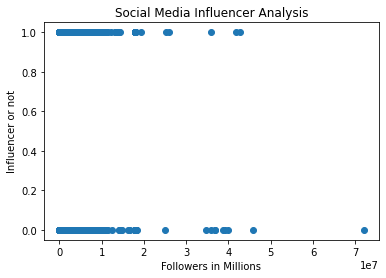

In [83]:
import matplotlib.pyplot as plt
plt.scatter(follower_count,choice)
plt.xlabel('Followers in Millions') 
#the total followers is the sum of followers all platforms
plt.ylabel('Influencer or not')
plt.title('Social Media Influencer Analysis')
plt.show()